## Introduction
Loops come to us naturally, we learn about Loops in almost all programming languages. So, by default, we start implementing loops whenever there is a repetitive operation. But when we work with a large number of iterations (millions/billions of rows), using loops is a crime. You might be stuck for hours, to later realize that it won’t work. This is where implementing Vectorisation in python becomes super crucial.

## What is Vectorization?

Vectorization is the technique of implementing (NumPy) array operations on a dataset. In the background, it applies the operations to all the elements of an array or series in one go (unlike a ‘for’ loop that manipulates one row at a time).  

Many complex systems nowadays deal with a large amount of data. Processing such a large amount of data in python can be slow as compared to other languages like C/C++. This is where vectorization comes into play. In this tutorial, we will learn about vectorizing operations on arrays in NumPy that speed up the execution of Python programs by comparing their execution time.


### USE CASE 1: Finding the Sum of numbers
First, we will look at a fundamental example of finding the sum of numbers using loops and Vectorization in python.



#### use loops

In [7]:
import time
start = time.time()


# iterative sum
total = 0
# iterating through 1.5 Million numbers
for item in range(0, 1500000):
    total = total + item


print('sum is:' + str(total))
end = time.time()
timeForLoop = end - start
print(f"total time for loop: {end - start} s")


sum is:1124999250000
total time for loop: 0.37195277214050293 s


#### use vectorization

In [8]:
import numpy as np

start = time.time()

# vectorized sum - using numpy for vectorization
# np.arange create the sequence of numbers from 0 to 1499999
print(np.sum(np.arange(1500000)))

end = time.time()
timeForVector = end - start
print(f"total time for vectorization: {end - start} s")

speedup = timeForLoop / timeForVector

print(f"speedup = timeForLoop / timeForVector = {speedup}")


1124999250000
total time for vectorization: 0.003297567367553711 s
speedup = timeForLoop / timeForVector = 112.7961101872605


## Vectorized Operations using NumPy
### 1. Add/Subtract/Multiply/Divide by Scalar

Addition, Subtraction, Multiplication, and Division of an array by a scalar quantity result in an array of the same dimensions while updating all the elements of the array with a given scalar. We apply this operation just like we do with variables. The code is both small and fast as compared to for-loop implementation.

In [14]:
import numpy as np
from timeit import Timer

# Creating a large array of size 10**6
array = np.random.randint(1000, size=10**6)
num = 5

# method that adds elements using for loop
def add_forloop():
  # TODO
  pass

# method that adds elements using vectorization
def add_vectorized():
  # TODO
  pass

# Finding execution time using timeit
computation_time_forloop = Timer(add_forloop).timeit(1)
computation_time_vectorized = Timer(add_vectorized).timeit(1)

print("Computation time is %0.9f using for-loop"%computation_time_forloop)
print("Computation time is %0.9f using vectorization"%computation_time_vectorized)
print("speedup = timeForLoop / timeVector =%0.2f"%(computation_time_forloop/computation_time_vectorized))


Computation time is 0.177629014 using for-loop
Computation time is 0.001630297 using vectorization
speedup = timeForLoop / timeVector =108.96


In [ ]:
# # method that adds elements using for loop
# def add_forloop():
#   new_array = [element + num for element in array]

# # method that adds elements using vectorization
# def add_vectorized():
#   new_array = array + num

#   # new_array = array + 1

### 2.Sum and Max of array

For finding the sum and maximum element in an array, we can use for loop as well as python built-in methods sum() and max() respectively. Lets compare both of these ways with numpy operations.



In [19]:
import numpy as np
from timeit import Timer

# Creating a large array of size 10**5
array = np.random.randint(1000, size=10**5)

def sum_using_forloop():
  sum_array=0
  for element in array:
    sum_array += element

def sum_using_builtin_method():
  sum_array = sum(array)

def sum_using_numpy():
  # sum_array = np.sum(array)
  sum_array = array.sum()

time_forloop = Timer(sum_using_forloop).timeit(1)
time_builtin = Timer(sum_using_builtin_method).timeit(1)
time_numpy = Timer(sum_using_numpy).timeit(1)

print("Summing elements takes %0.9f units using for loop"%time_forloop)
print("Summing elements takes %0.9f units using builtin method"%time_builtin)
print("Summing elements takes %0.9f units using numpy"%time_numpy)

Summing elements takes 0.015289550 units using for loop
Summing elements takes 0.008029722 units using builtin method
Summing elements takes 0.000113341 units using numpy


In [20]:
import numpy as np
from timeit import Timer

# Creating a large array of size 10**5
array = np.random.randint(1000, size=10**6)

def max_using_forloop():
  maximum=array[0]
  for element in array:
    if element > maximum:
      maximum = element

def max_using_builtin_method():
  maximum = max(array)

def max_using_numpy():
  maximum = np.max(array)

time_forloop = Timer(max_using_forloop).timeit(1)
time_builtin = Timer(max_using_builtin_method).timeit(1)
time_numpy = Timer(max_using_numpy).timeit(1)

print("Finding maximum element takes %0.9f units using for loop"%time_forloop)
print("Finding maximum element takes %0.9f units using built-in method"%time_builtin)
print("Finding maximum element takes %0.9f units using numpy"%time_numpy)


Finding maximum element takes 0.311211291 units using for loop
Finding maximum element takes 0.139840153 units using built-in method
Finding maximum element takes 0.000888493 units using numpy


### 3. Dot product

Also known as Inner Product, the dot product of two vectors is an algebraic operation that takes two vectors of the same length and returns a single scalar quantity. It is calculated as a sum of the element-wise product of both vectors. In terms of a matrix, given 2 matrices a and b of size N x 1, the dot product is done by taking the transpose of the first matrix and then mathematical matrix multiplication of aT(transpose of a) and b.

$$ a \cdot b = \sum_{i}^{N}a_i*b_i$$

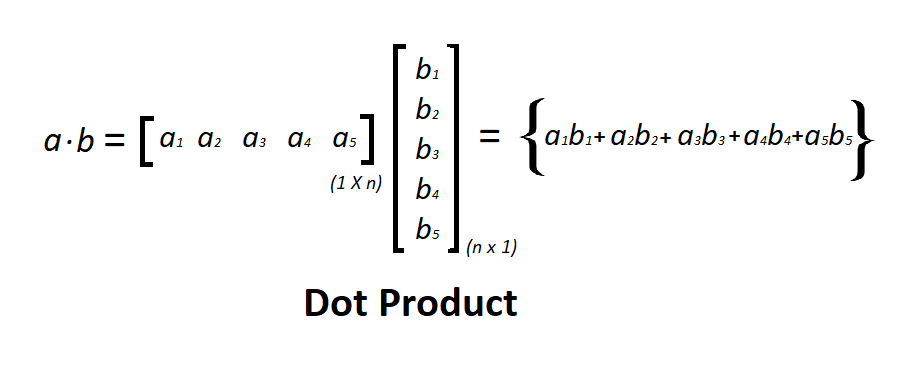


In [22]:
import numpy as np
from timeit import Timer

# Create 2 vectors of same length
length = 100000
vector1 = np.random.randint(10000, size=length)
vector2 = np.random.randint(10000, size=length)

# Finds dot product of vectors using for loop
def dotproduct_forloop():
  dot = 0.0
  for i in range(length):
    dot += vector1[i] * vector2[i]

# Finds dot product of vectors using numpy vectorization
def dotproduct_vectorize():
  dot = np.dot(vector1, vector2)


# Finding execution time using timeit
time_forloop = Timer(dotproduct_forloop).timeit(1)
time_vectorize = Timer(dotproduct_vectorize).timeit(1)

print("Finding dot product takes %0.9f units using for loop"%time_forloop)
print("Finding dot product takes %0.9f units using vectorization"%time_vectorize)
print(f"speedup = {time_forloop / time_vectorize}")

Finding dot product takes 0.111006779 units using for loop
Finding dot product takes 0.000231278 units using vectorization
speedup = 479.97119963262827


### 4. Outer Product

The outer Product of two vectors produces a rectangular matrix. Given 2 vectors a and b of size nx1 and mx1, the outer product of these vectors results in a matrix of size nxm.
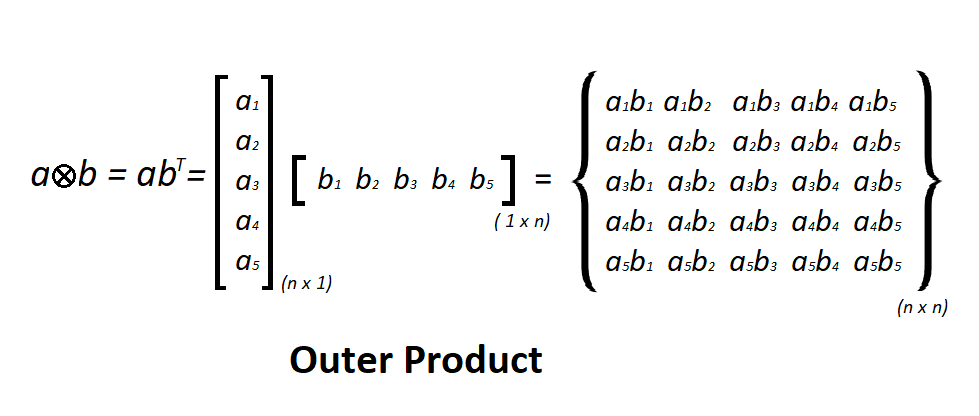


In [24]:
import numpy as np
from timeit import Timer

# Create 2 vectors of same length
length1 = 1000
length2 = 500
vector1 = np.random.randint(1000, size=length1)
vector2 = np.random.randint(1000, size=length2)

# Finds outer product of vectors using for loop
def outerproduct_forloop():
  outer_product = np.zeros((length1, length2), dtype='int')
  for i in range(length1):
    for j in range(length2):
      outer_product[i, j] = vector1[i] * vector2[j]

# Finds outer product of vectors using numpy vectorization
def outerproduct_vectorize():
  outer_product = np.outer(vector1, vector2)

# Finding execution time using timeit
time_forloop = Timer(outerproduct_forloop).timeit(1)
time_vectorize = Timer(outerproduct_vectorize).timeit(1)

print("Finding outer product takes %0.9f units using for loop"%time_forloop)
print("Finding outer product takes %0.9f units using vectorization"%time_vectorize)
print(f"speedup = {time_forloop / time_vectorize}")

Finding outer product takes 0.228193103 units using for loop
Finding outer product takes 0.001098139 units using vectorization
speedup = 207.7998349789956


### 5. Matrix Multiplication
Matrix Multiplication is an algebraic operation in which rows of the first matrix is multiplied by a column of the second matrix. For 2 matrices of dimensions p x q and r x s, a necessary condition is that q == r for 2 matrices to multiply. The resulting matrix after multiplication will have dimension p x s.




In [25]:
import numpy as np
from timeit import Timer

# Create 2 vectors of same length
n = 100
k = 50
m = 70
matrix1 = np.random.randint(1000, size=(n, k))
matrix2 = np.random.randint(1000, size=(k, m))

# Multiply 2 matrices using for loop
def matrixmultiply_forloop():
  product = np.zeros((n, m), dtype='int')
  for i in range(n):
    for j in range(m):
      for z in range(k):
        product[i, j] += matrix1[i, z] * matrix2[z, j]

# Multiply 2 matrices using numpy vectorization
def matrixmultiply_vectorize():
  product = np.matmul(matrix1, matrix2)

# Finding execution time using timeit
time_forloop = Timer(matrixmultiply_forloop).timeit(1)
time_vectorize = Timer(matrixmultiply_vectorize).timeit(1)

print("Multiplying matrices takes %0.9f units using for loop"%time_forloop)
print("Multiplying matrices takes %0.9f units using vectorization"%time_vectorize)
print(f"speedup = {time_forloop / time_vectorize}")

Multiplying matrices takes 0.262222787 units using for loop
Multiplying matrices takes 0.000583258 units using vectorization
speedup = 449.5828381213652


### 6. Element Wise Product in Matrix
The element-wise product of two matrices is the algebraic operation in which each element of the first matrix is multiplied by its corresponding element in the second matrix. The dimension of the matrices should be the same.

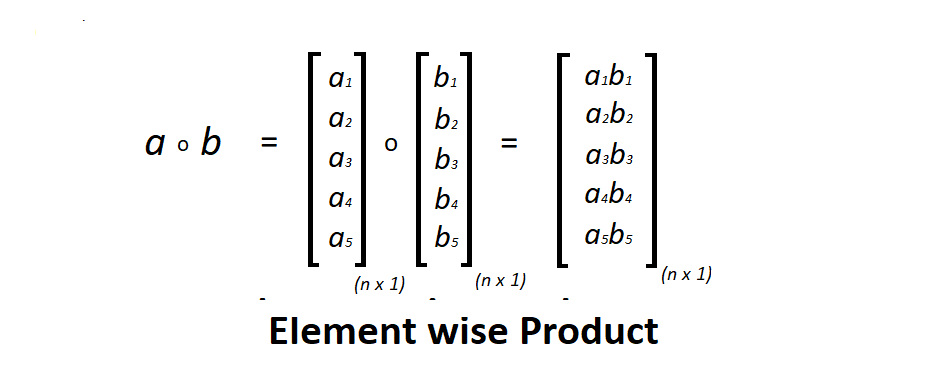


In [26]:
import numpy as np
from timeit import Timer

# Create 2 vectors of same length
n = 500
m = 700
matrix1 = np.random.randint(1000, size=(n, m))
matrix2 = np.random.randint(1000, size=(n, m))

# Multiply 2 matrices using for loop
def multiplication_forloop():
  product = np.zeros((n, m), dtype='int')
  for i in range(n):
    for j in range(m):
      product[i, j] = matrix1[i, j] * matrix2[i, j]

# Multiply 2 matrices using numpy vectorization
def multiplication_vectorize():
  product = matrix1 * matrix2

# Finding execution time using timeit
time_forloop = Timer(multiplication_forloop).timeit(1)
time_vectorize = Timer(multiplication_vectorize).timeit(1)

print("Element Wise Multiplication takes %0.9f units using for loop"%time_forloop)
print("Element Wise Multiplication takes %0.9f units using vectorization"%time_vectorize)
print(f"speedup = {time_forloop / time_vectorize}")



Element Wise Multiplication takes 0.181445541 units using for loop
Element Wise Multiplication takes 0.000804968 units using vectorization
speedup = 225.4071478590622
